# Content Analysis on People's Personal Finance Concerns Based on Reddit Data




## Research Questions

What's the most frequent concern of personal finance? Is there a heterogeineity among different groups? Does the topics of these concerns change over time?

Corpora:

* Reddit Articles in subreddit [Personal Finance](https://www.reddit.com/r/personalfinance/)

* Investing subreddit: [Investing](https://www.reddit.com/r/investing/)

* Wall Street Bets subreddit: [Wall Street Bets](https://www.reddit.com/r/wallstreetbets/)


Social Game:

Consumption and investment are two import social indicators in economics. So, I would like to study people's consumption and behavior by their online postings.


Actors:

Most people who post articles on Reddit are young people, many of them are 20-30 (many of them reveal their age in posts) and it's interesting to learn the consumption and investment patterns of these young people.


World:

A large group of anxious young people--we can find students who just got their first job start to consider paying back student loan, buying houses/cars, taking care of aging parents, for the first time in their life. They ask advice from others on online platform to make finance-wise decisions.

What's people's biggest concerns in personal finance? Do they Change over time?

## Why my research important?

In the most widely used fomula in Macroeconomics: Y = C + I + G + NX 
(Total economic output = Consumption + Investment + Government spending + Net Export), consuption and investment are individual activities that constitute of our society. 

A [Federal Reserve survey](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiB6O2fhs3uAhXQXc0KHbeLAXUQFjAAegQIARAC&url=https%3A%2F%2Fwww.federalreserve.gov%2Fpublications%2Ffiles%2F2017-report-economic-well-being-us-households-201805.pdf&usg=AOvVaw33ULJILWvmE0JU8Dweye4R)  finds almost 40% of American adults wouldn't be able to cover a $400 emergency with cash, savings or a credit-card charge that they could quickly pay off. Why do people in the United States, the most powerful country in the world, face this problem? What's the heaviest financial burden on people? Where is the money going? What are the topics that people who seek financial security talks every day? To answer these questions, we can analyze people's posting online.

**The benefits people can get after they learn the results of my study**

My study will report the most common financial burden on people, and the time trend of the changes most-discussed topics. So people can know what bothers us and if the things that bother us change over time.



## My sample

**The rationale behind my proposed sample design**
Collect data from online [financial discussion forums](https://www.doughroller.net/personal-finance/8-awesome-online-forums-personal-finance-investing/): Reddit-Personal Finance, myFICO Forums, YNAB Forums, Morningstar Forums, Reddit–Investing, and Bogleheads Forum. My sample will include the first four datasets.

**Social Game:**
People's income and financial concern.

**Social Actors:**
Online financial websites users: people who post their concern, seek for advice, or share personal experience.

**Its virtues with respect to my research questions:**
People's online discussion is a reflect of their real-life concern

**Limitations:**
Generalization Bias--most users of online platforms are young people who are used to the internet. Middle-age people may not be willing to disclose their financial concerns online.

**Alternatives:**
Other discussion websites.

**Methods to scale up my sample:**
I can boarden my dataset by scale up the time peorid to include more aticles from myFICO Forums, YNAB Forums, Morningstar Forums, Reddit–Investing, Bogleheads Forum, Fat Wallet Forums, and Bigger Pockets Forum.


# Scrape Corpora from Reddit with PRAW

In [146]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git
import praw

#All these packages need to be installed from pip
import requests #for http requests
import bs4 #called `beautifulsoup4`, an html parser
import pandas as pd#gives us DataFrames
import pandas
import docx #reading MS doc files, install as `python-docx`

import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories

For privacy issue, API key is in json file (which is in .gitignore) because it contains my password and personal tokens and my GitHub repository is public.
I will save the data for later use, so you don't need to scrape the data by yourself. However, if you want to replicate this process, you can create your own Reddit API conveniently by following [this guidance](https://praw.readthedocs.io/en/latest/getting_started/authentication.html).

In [4]:
with open('Reddit_API_info.json') as f:
    api_info = json.load(f)
    f.close()

In [9]:
reddit = praw.Reddit(client_id = api_info['client_id'],
                     client_secret = api_info['client_secret'],
                    user_agent = api_info['user_agent'],
                    username = api_info['username'],
                    password= api_info['password'])

### Scrape from Subreddit 

In [120]:
subred = reddit.subreddit("personalfinance")

# several attribute helps us to sort articles in subreddit
hot = subred.hot(limit = 10000) # sort all the subreddit articles by hot
new = subred.new(limit =10000)
controv = subred.controversial(limit = 10000)
top = subred.top(limit=10000)
gilded = subred.gilded(limit=10000)

In [22]:
type(hot)

praw.models.listing.generator.ListingGenerator

As shown above, this can help us get a generator object, then we can use a loop to retrieve the data. However, Reddit has a limitation that it will only have at most ~1000 posts in each category (which is far more than a real person's reading ability) But it's not enough for computational analysis, especially for dynamic topic analysis in the later part. There are archived Reddit data on Google's Big Query platform, but it has stopped updated since 2019. So I decide to study the latest reddit post for the most part of this project, and use the archived historical reddit data in the dynamic topic modeling analysis.

In [121]:
pf_top = []
for i in top:
    pf_top.append({'title': i.title,
                        'text': i.selftext,
                        'url':i.url,
                        'created_utc':i.created_utc
                       })
    print(i.title)
pf_top = pd.DataFrame(pf_top)

You are not "family" to your company. If you have an opportunity to better yourself, take it. They will do the same when it comes to cutting ties with you.
If you’re ripped off by Comcast (or any internet company), Wells Fargo (or any bank/student lender), or Aetna (or any health insurance company), here’s how to get your money back.
U.S. Breaks Up Fake I.R.S. Phone Scam Operation -- 21 people sentenced for up to 20 yrs, 32 in India indicted
I made a spreadsheet for people who don't know how to budget!
Stop Spending Money on Food! -- BUY A CROCKPOT
Quick Reminder to Not Give Away Your Salary Requirement in a Job Interview
Bank of America just imposed a new $60 annual fee on their previously free personal savings account.
For everyone shopping on Amazon's Prime Day: "savings" from sales aren't savings if you weren't already planning on buying the item.
In most cases, it will cost your employer far more to replace you than it would to give you a raise. So ask firmly.
IRS will allow emplo

Successfully negotiated a 45% raise in salary, thanks pf!
Bank of America is refusing to give back $9,800 to my dad's account after someone fraudulently stole his funds.
GE freezes pensions for 20,000 employees - aka why I always urge people to invest in their own retirement funds
Saying: "I don't want to save, I want to live life and have fun while I'm young" is just an excuse that makes you feel better about your bad spending habits.
Almost 70% of millennials regret buying their homes.
Things I wish I'd done in my 20's
Gave a two month notice I was leaving my company, was told it was unprofessional. Advice?
Negotiated a 17k raise after ~ 2 1/2 years of stagnation. Feels great!
Surprise $2,700 medical bill from a "Surgical Assistant" I didn't even know was at my surgery.
U.S. Tax Filers making less than $65,000 per year: The IRS has a 100% Free-File option that is rarely if ever publicized
This was my first year filing my own taxes. So, I tried 3 different “free” tax softwares to see 

If you can afford it, pay a little bit extra to get a lot of extra protection regarding car insurance.
I called the hospital to work out a payment plan, got a big discount with no effort.
For all the 2020 graduates and those who are now turning 18, plan ahead to open a new bank account that is solely in your name.
Alert for people with Capital One savings accounts...
I'm a 27 year old single male looking to get out of manual labor and start from the bottom somewhere with the highest potential for a successful future.
I've been offered a promotion, was forceful on salary and my boss freaked out, is avoiding me
Wife got a job offer that feels like a scam
Amazon seller fraudulently used my husband's SSN and now the IRS wants us to pay taxes on income they generated selling.
$65k+, hate my life vs. $45k, happier
Some helpful information regarding medical insurance - based on 25 years experience
My husband and I are idiots. We've been bamboozled by a financial advisor.
Over a year after it 

What is the point of an "annual review" if no raises are ever given?
I made a Google Sheet to replace Quicken
Treat paying off debt like earning a raise.
My boss offered me my first salary position and expects me to counter his offer. What do I counter with if I’m already satisfied with his offer?
Check for $1900 that isn’t mine was deposited into my account.
What am I supposed to do when my boss tells me I should "think about whether or not I want to be here" at my job?
Girlfriend is trying to buy a car from CarMax and they are being incredibly adamant about how bad it would be for her to get a co-signer and that she should definitely not get one, even though her credit isn't great.
[Update] Just got out of prison and owe SO much money...
It's happened again: My HR rep fell victim to a phishing scam and sent all 50 employees' tax info to some fraudster yesterday. Company has yet to notify everyone officially. What should I do?
$5 dollars for 5 years: a savings experiment.
My girlfrien

I believe that to truly get your financial life in order, you need to know exactly where your money comes from and where your money goes. In 2017 i tracked every penny in and every penny out while strictly categorizing it
Teachers and students can download Microsoft Education 365 and get all Microsoft Office programs for free, as opposed to the typical $99.99/year subscription price!
"The best time to look for a job is when you don't need one."
So payday loans are getting ridiculous
Stop thinking of your debt in terms of your yearly salary, think of it in terms of your salary after taxes and living expenses.
I accepted a counter offer from my employer, and they back tracked..
I'm glad I didn't think, "It's too late to start a Roth IRA"
In case you haven’t, you can call your auto insurance provider and lower your monthly payment if you’re no longer commuting to work due to social distancing!
The best time to look for a job is when you have a job - solid evidence from the Federal Reserve

BEWARE: scammers are making unsolicited calls claiming to be IRS officials attempting to steal your identity. They may also leave “urgent” callback requests through phone “robo-calls,” or via a phishing email as tax deadline nears! Do not give any information. Hang up immediately.
My credit card bank has forgiven 1300 dollars on my card without even asking
Ex-Boss asks me to drop an unemployment claim
Rent increase continues to outgrow wage increase.
I [34M] was told last month I was getting a 15% raise on my salary [47.5k]; got my first paycheck today and my net pay only increased by $150. Where’d my raise go?
Bill from AT&T wireless came to my house for $730. I don't have AT&T wireless....
You can cancel your 24 hour fitness membership online now
Very Productive Year, Disappointing Raise, Boss Said He Had Too Many "Good" Employees
In case your identity is ever compromised, I quickly just want to let you all know that identitytheft.gov is a fantastic resource.
Update RE: I might be ki

My [parent/sibling/significant other/friend] wants me to cosign on a [auto loan/mortgage/student loan] with them. Should I do it?
Always check your paystubs
Consider working at a University if you want another degree but can't afford it
Wife was overpaid. Employer demanding gross repayment.
My family is forcing me to co-sign a mortgage loan
PLEASE take some time to understand your benefits at work
Lifestyle inflation is a bitch
Do not use TrueCar
Successfully lowered a medical bill by 81%
I went from being jobless and 43k in debt to a job, wife, house, child, and debt free in 2.5 years - all under 60k in salary.
Many will see their 401k statements and think
Denied for credit card because "You have had 84 hits on your credit in the last 30 days"
Is my landlord responsible for paying my exorbitantly high electricity bill?
UPDATE: Sprint is holding my credit hostage over their error and sending me to collections
Charge-backed 24 Hr Fitness through my bank, they are contacting me trying to

Call Discover unless you're comfortable with them selling your data
Always ask for proof of debt!
Do I have enough saved to adopt a cat?
Engineer about to be fired but given option to resign, should I take it?
I’m an intern that makes $15/h and my job never takes taxes out of my paychecks because they classify me as a contractor. I read that I don’t have to pay taxes if I make under $12,000/year but that doesn’t sound true. How do I pay my taxes? Am I exempt from certain taxes?
Parents want me to take out a loan/mortgage in my name towards new house. Please advise.
New mortgage servicer is charging 15$ per payment to pay mortgage online. Is that normal? Seems insane.
450 Reasons to Check Local Classifies Before Buying New
I laid off from my 99k job, my 8-month pregnant wife is still working making 90k (get 16wks paid leave), our emergency fund mostly drained from a prior emergency, and the day before I was laid off I signed up for a PMP course that will only give me a 75% refund; what 

I just got a 50% raise. [$60k to $90k]
Firefighter (47M), I got injured on the job and now I have to retire. I wasn't planning on this, so I have several questions and need lots of advice.
I have a meeting in two hours at which I expect to be let go.
MIT's living wage calculator is actually pretty accurate
Oh...so that’s how interest works
USPS lost our money order, landlord tells us we have to write a new check by Monday. Really need advice .
20 years old, $0 expenses per month making $14/hour 30-40 hours per week. What do I do with my money?
So, I'll be going to prison soon. How will my financial situation be when I get out?
A cautionary tale for young students and letting your parents handle your student loans
We have a total wedding cost of about $8000 (which we have). Is it worth getting a credit card to put it all on for the rewards? If so which one? (Credit score is just under 800)
UPDATE: Accepted a job offer, less than 24 hours later another company offered 15K more. What's th

Employer adjusts 80 hours down to 78.667 hours every paycheck. Salaried and the amount I'm paid is right. Curious if this is some kind of loophole.
Breaking the habit of going out to eat
Just opened some mail to find that have had an outstanding balance from an ER visit last November where they didnt have my insurance on file even though it's the ER in the hospital I work at and have insurance through. Now it's been sent to a collection agency and im freaking out.
My retired father has a considerable income but is having trouble paying bills/taxes. I'm worried about his spending habits. What course of action, if any, can I take?
I was so obsessed with saving money and frugal living and it made me depressed.
Wife broke her back in the Dominican and we're at a loss for what to do
My father has about $400k just sitting in his savings account. What are his best options for long term (10-15 year) returns?
My Grandma left me a fund in NY(USA) but, she has parkisons, she cant remember where o

In [124]:
len(pf_top)

991

We only want got 894 posts here, since Reddit restricts it to less than 1000. But we can still analysze it! We can accquire posts in this subreddit via archive later.

In [122]:
subred = reddit.subreddit("wallstreetbets")

# several attribute helps us to sort articles in subreddit
hot = subred.hot(limit = 10000) # sort all the subreddit articles by hot
new = subred.new(limit =10000)
controv = subred.controversial(limit = 10000)
top = subred.top(limit=10000)
gilded = subred.gilded(limit=10000)

wsb_top = []

for i in top:
    wsb_top.append({'title': i.title,
                        'text': i.selftext,
                        'url':i.url,
                        'created_utc':i.created_utc
                       })
    print(i.title)
wsb_top = pd.DataFrame(wsb_top)

Times Square right now
UPVOTE so everyone sees we got SUPPORT
GME YOLO update — Jan 28 2021
GME YOLO month-end update — Jan 2021
It’s treason then
CLASS ACTION AGAINST ROBINHOOD. Allowing people to only sell is the definition of market manipulation. A class action must be started, Robinhood has made plenty of money off selling info about our trades to the hedge funds to be able to pay out a little for causing people to loose money now
GME YOLO update — Feb 19 2021
Used some of my GME tendies to buy Nintendo Switches from Gamestop, then donated them to a Children's Hospital. Got featured on the local news and brought glory to WSB.
GME YOLO update — Jan 27 2021 --------------------------------------- guess i need 102 characters in title now
IT'S POWER TO THE TRADERS NOW
GME YOLO update — Feb 1 2021
Can we all take a moment and appreciate the Mods who have grinded through this and held our community together. Thank you.
Wow super bowl commercial for us
That’s what I thought
I am proud to 

It’s a sign
💎🙌🏻 You heard the Wolf!
ONE OF US - ONE OF US
America, Meet GameStop: WE'RE NOT FUCKING LEAVING 💎🙌💎 FOR LIFE
The Legend of $GME
Which one of you glorious bastards did this?
Who stopped the losses for the millions who lost their jobs and homes during the 2007 GFC or 2020 Covid-19 pandemic? You don't get to just shut off the market just because you are on the wrong side of a trade.
Don’t stop holding, men! 🎮🛑🚀🌑
$GME & $AMC Line comparation, from the last 5 Days...
Hey, Bloomberg, how about you go fuck yourselves.
$GME Gang Awarding Their Own Posts
#LONG LIVE THE MEME 🚀🚀🚀
BREAKING: CNBC Officially Gives Up, Stocks Enter Kangaroo Market
How the SEC treats Hedge Funds vs Retail investors
Just liquidated $188K worth of stonks AKA FRESH POWDER for the battle tomorrow 🚀🚀🚀🚀
Power to the players
I recruited an astronaut to help get us to the moon. He’s also an actor, scientist, doctor, and lawyer, and seriously knows his stuff! He loves the movies and we love the stock! Long live AMC

If PAPA MUSK IS FOR US WHO CAN BE AGAINST US !!! IM STILL HOLDING!!!
Well, Fuck
It needs to be said louder and more often. WE ARE KILLING IT.
We made it to the bull. Taking over boys!💎💎
🚀🚀 $GME Premarket be like 🚀🚀
Great Scott...$AMC
To the moon we go! 🚀🚀🚀🌙
$GME after the hedgies dropped it to 198
This is so satisfying to look at
"We Can Stay Retarded Longer Than You Can Stay Solvent" - Someone
My best GME gain porn. $1,295 --> $959,663 in just over 3 weeks. Sold because of brokers blocking buy orders. Sorry
On. Serious note: respect the decisions of deepfuckingvalue from here on out
It really do be like that doe
GME Megathread Part 2 for March 10, 2021
Economic Scarcity 🤔💰
My gf and I are holding GME from South Korea. Hold the line!!
Please stop promoting Belfort
I’m so fucking proud of every single person in or connected to this sub.
Stonks
What 3,280,000 jobless claims looks like versus the past 50 years of reports
u/SquishedPeter's Cat Megathread for March 2nd, 2021
Why This Weeken

Robinhood Is Lying - You Are Blocked Acquiring More Than 5 Total Shares
$6k ➡️ $192k. Made $170k in day and then stomached yesterday’s dip. 19 years old and not selling til we’re at a few mil. WE DECIDE GME’S PRICE — HOLD STRONG
Don't relent now boys. I just bought 1000 on margin. 🚀
This sub in nutshell
I was there the day the strength of men endured...
20,000% gain..... on one .59 cent option lol 65$ into 12k
After doing my DD on researching Chinese companies everything starts to become clear....
If you’re wondering why Robinhood wasn’t working...
Me getting ready to fight the Hedgies on Monday market open by buying more GME
Take it from MARK FUCKING CUBAN. Don’t panic sell and hold that shittt. 💎 🙌🏻 > 📄 🙌🏻
Someone is actively driving attention to non-GME posts on reddit. Don't be fooled comrades. 💎🙌🚀🚀🚀
“We live in a fraudulent system” - someone from the Big Short
WE'RE THE GUARDIANS OF GAMESTOP
Bought at 300$ at the top but I know my chimps coming to get me soon. Ape never leave ape 

GME with AMC and BB overlay - Virtually Identical.
WALLSTREETBETS VS WALLSTREET: SHORT SQUEEZE ROUND 2
My SURGEON Is On WSB, And Basically Just Called Me A Retard
Jokes on them. Red is my favorite color
Me, a long time lurker who suddenly YOLO’d on $GME trying to understand how I got myself into this mess.
All of Reddit is holding with us! Thank you to the other communities holding the line! DIAMOND HANDS!!
There's a difference between joining wsb and becoming a member. Today, many of you became members
Man stole $122m from Facebook and Google by sending them random bills, which the companies dutifully paid
Not to brag, but looks like I’m so autistic that people are writing articles about my exploits
Hey if it's fucking yellow outside does that mean stocks are gonna go up or down?
Using literal chicken shit to predict next week ft. babey chickies
Why we're still winning, and why we're still going to the moon. [REASSURANCE DD]
Not. Fucking. Selling! GME AMC💎🙌🏻 Who's with me?
This is why

In [125]:
len(wsb_top)

953

In [123]:
subred = reddit.subreddit("investing")

# several attribute helps us to sort articles in subreddit
hot = subred.hot(limit = 10000) # sort all the subreddit articles by hot
new = subred.new(limit =10000)
controv = subred.controversial(limit = 10000)
top = subred.top(limit=10000)
gilded = subred.gilded(limit=10000)

invt_top = []

for i in top:
    invt_top.append({'title': i.title,
                        'text': i.selftext,
                        'url':i.url,
                        'created_utc':i.created_utc
                       })
    print(i.title)
invt_top = pd.DataFrame(invt_top)

Robinhood and other brokers literally blocking purchase of $GME, $NOK, $BB, $AMC; allow sells
United Airlines stock down over 5% premarket trading
Bitcoin was nearly $20,000 a year ago today
If in 2001, you bought $399 of Apple stock instead of buying the original iPod, today that stock would be worth ~$62,000.
Jim Cramer Gave an Interview in 2006 on how the Hedge Funds Manipulate the Markets
Historically it's way better to invest at market close than at market open, most gains occur overnight
Uber Fined $649 Million for Saying Drivers Aren’t Employees
Long Island Ice Tea Corp, a beverage company, was up 500% premarket today after changing its name to Long Blockchain Corp, despite having no relation to blockchain in its business
Emotional involvement has never been this high, please understand the risk involved.
TIL if you had bought EA stock after they were voted "The Worst Company in America" your investment would be up by more than 378% today
Tesla posts profit of $2.92, stock jumps

US now pumping more oil than Russia and Saudi Arabia
Apple is no longer the most valuable brand in the world as Google takes top spot
Musk tweet knocks $14bn off Tesla market value
I want to verbally vomit a few chunks about how vile this sub is.
Reasons We May Not Be in a Bubble
Cramer thinks Wall Street pros may be playing a game with Robinhood traders
Johnson & Johnson has been ordered to pay nearly $4.7bn in damages to 22 women who claim the company’s talcum powder contributed to them developing ovarian cancer (six of whom have died from ovarian cancer).
Buffett wins $1M bet that the S&P 500 would outperform hedge funds
'Johnson & Johnson knew for decades that asbestos lurked in its Baby Powder' - Down 8% and falling.
Disney and other companies reportedly suspend YouTube ads over news of pedophile network on the site
Goldman Sachs warns data point to a historic and frankly apocalyptic surge in unemployment insurance claims, from current 281,000 to 2,250,000 in next week’s report. Y

U.S. labor jobless claims increase to 870,000. Total unemployment 26 million.
Rihanna wipes $1bn off Snapchat after criticising app for making a 'joke' of domestic violence
FT: Nikola founder bought truck designs from third party
Buffett buys back record $5.1 billion in Berkshire stock as coronavirus hits operating earnings
Opinion: The market is rising not because people ignore the severity of the crisis but because financial statements of Q1 hasn't been released yet
Krugman: "Investors are buying stocks in part because they have nowhere else to go. In fact, there’s a sense in which stocks are strong precisely because the economy as a whole is so weak."
Netflix To Sell $1 Billion In Bonds After Adding 16 Million New Subscribers.
What if jobs don't come back? Stanford study says 42% of job losses will result in permanent job loss.
"American Rescue Plan" - Biden proposes $1.9T stimulus
China stocks plunge amid heavy selling in the energy sector and growing worries about the economy
Appl

AMC theaters in talks to hire bankruptcy law firm Weil Gotshal amid coronavirus shutdown
Jeff Bezos is the world’s richest man
CRSP announces their gene editing treatment in a remarkable study ostensibly cures patient of sickle cell anemia
Where is Jim Cramer?
Pfizer vaccine candidate must be kept at around -100 degrees Fahrenheit, who will supply the refrigerators?
Tesla just announced a 5-for-1 split
Trump says tariffs on $200 billion of Chinese goods will increase to 25% on Friday
Boris Johnson moves to ban Huawei in the UK by 2027
Buffett's Berkshire doubles profit, repurchases $900 million stock in third quarter
The end of GameStop
Coca-Cola in talks with Aurora to develop cannabis drinks
US 1 Month treasury just went negative
Oil $11.66 could go below $10.00
In A Bold Asset Grab, Robinhood Offers 3% Interest On Checking And Savings Accounts
Cathy Wood predicted Bitcoin, Tesla, Square, Invitae and now Crispr
[CNBC] Robinhood traders cash in on the market comeback that billionaire 

For those of you who do extensive research prior to buying a stock, what do you look for in a companies financial statement or financial analysis when deciding to buy or sell? (I.e. profit margin, operating costs, short % of float, p/e, etc.). What do you place you the most weight on?
Netflix market cap hits $100 billion for first time after adding more subscribers than expected
Robinhood brought in more than 40 percent of its revenue in early 2018 from selling its customers’ orders to high-frequency trading firms
Let me get this right, Soft Bank buys billions of dollars worth on NIVDIA Option Calls. Then Soft Bank announces its completion sell of ARM to NVIDIA. Which causes an additional 10% gain on the NVDA stock price.
Carl Icahn Scores $1.3 Billion on Bet Against Shopping Malls
650,000 Tesla Cybertruck preorders apparently
Bloomberg: Boeing’s 737 Max Software Outsourced to $9-an-Hour Engineers
Berkshire Hathaway snapped up approximately 20.9 million shares of Barrick Gold in Q2, a 

PLTR jumps 12% even though US market's closed
MSFT to acquire Bethesda
My portfolio hit 500k!
Lawmakers agree to $2 trillion stimulus early morning
Lost more money actively trading than holding index funds
SEC charges Robinhood $65m
Beyond Meat is expected to report its first profit as a public company after the close today but there will probably still be a big sell off tomorrow as the lockup period ends and insiders (who account for 80% of outstanding stock) are finally allowed to sell their stock and realize large profits
-140,000:Payrolls drop for the first time since April, unemployment rate steadies at 6.7%
Oxford University’s coronavirus vaccine with AstraZeneca shows positive immune response in early trial
Gilead Sciences' Antiviral Drug Remdesivir Flops in First trial - FT
NVIDIA Shares Reach All-Time High as Notebooks Account For 30% Revenue
Herbalife to pay 123MM in Chinese bribery case
Comcast is in talks to sell its 30% stake in Hulu to Disney
Elon Musk taunts short seller

For those who are buying company stocks to avoid ETF fees in ARK
US crude plunges 4.2%, settling at $66.43, in biggest daily loss in three months
Beyond Meat IPO Raises $241 Million as Veggie Appetite Grows
Bloomberg: Nikola’s History of Discrepancies Has Been Hiding in Plain Sight
Goodbye until this is all over.
Amazon Founder, Jeff Bezos Net Worth Just Broke $100 Billion!
Fitch warns of possible downgrade to U.S. AAA credit rating if shutdown persists
Amazon Is Testing Its Own Delivery Service to Rival FedEx and UPS
JPMorgan lost $273 million on a single client in the fourth quarter
U.S. weekly jobless claims unexpectedly increase
Nikola targets critical YouTube accounts in copyright crackdown
BBC: Bitcoin Cash deals frozen as insider trading is probed
Delta revenue down 88% YoY Q2, for $5.7 billion loss. Estimates 2 years before sustainable recovery
US jobs report: unemployment rose to 4.4% in March after February's 50-year low
EBay, Stripe and Mastercard abandon Facebook’s libra cr

Amazon plans to launch a new Middle East marketplace, two years after buying Souq for $580 million
Disney suspends dividend
Lyft is threatening litigation against Morgan Stanley, accusing the firm of supporting short-selling
Stocks Jump 3.2% the Most in Almost 6 Weeks After Moderna Vaccine Announcement
CNBC’s Jim Cramer: ‘We are in a bear market’ - February 2016
Warren Buffett has long praised the virtues of putting money in low-fee index funds, but many of his companies don’t offer such funds in workers’ retirement accounts. It’s a problem shared by millions of Americans.
The recent TSLA price spike was timed too perfectly
TSLA up another 9% pre-market...
Target shares surge 13% as second-quarter profit jumps, retailer hikes earnings outlook
Bloomberg: Resist Your Inner Buffett. It's Time to Do Nothing
Amazon, Berkshire Hathaway, JPMorgan Chase appoint Dr. Atul Gawande as CEO of their newly formed health care company
Apple is spending $6 billion on original shows and trying to beat Di

Monsanto ordered to pay $289m damages in Roundup cancer trial
Some tips on buying when the market falls
Insider Trading has been rife on Wall Street, academics say
Trump announces plans to impose additional tariffs on $200bn worth of Chinese goods at 10%
Bank of America's Merrill Lynch routinely misled customers telling them stock trades were managed in-house, while turned over to outside firms
Intel in talks to buy Israel's Moovit public transit app for $1 billion
GE shares drop after Madoff whistleblower Harry Markopolos raises red flags on its accounting
Facebook market cap just hit $300 billion: It's now a bigger company than Disney, Fox, Viacom, Time Warner & CBS combined.
Warren Buffett: Banks will be worth more money 10 years from now
This high market values situation isn't going to change until & unless the US gov stimulus stops and it begins to unwind/extricate itself from the financial markets. So, my question is, how will it happen and what will it look like when The Great U

In [126]:
len(invt_top)

987

In [127]:
pf_top.to_csv('data\pf_top.csv')
wsb_top.to_csv('data\wsb_top.csv')
invt_top.to_csv('data\invt_top.csv')

# Counting Words & Phrases

In [140]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import nltk

# comp-linguistics
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

#Displays the graphs
import graphviz 

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile



#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook

%matplotlib inline

nlp = spacy.load("en_core_web_sm")

## Read the data

In [128]:
pf_df = pd.read_csv('data\pf_top.csv', index_col = 0).dropna().reset_index(drop=True)
wsb_df = pd.read_csv('data\wsb_top.csv', index_col = 0).dropna().reset_index(drop=True)
invt_df = pd.read_csv('data\invt_top.csv', index_col = 0).dropna().reset_index(drop=True)

In [129]:
print(f"Then length of Personal Finance Subreddit dataframe {len(pf_df)}")
print(f"Then length of Wall Street Bets Subreddit dataframe {len(wsb_df)}")
print(f"Then length of Investing Subreddit dataframe {len(invt_df)}")

Then length of Personal Finance Subreddit dataframe 977
Then length of Wall Street Bets Subreddit dataframe 159
Then length of Investing Subreddit dataframe 954


The data from Wall Street Bets are shorter than personal finance and investing, because when people discuss, they use a lot of image or videos or just emojis, which don't contain text information.

In [130]:
pf_df.head()

,title,text,url,created_utc
0,"You are not ""family"" to your company. If you h...",People tend to feel a sense of guilt when it c...,https://www.reddit.com/r/personalfinance/comme...,1.583364e+09
1,"Warning: AT&T applying ""customer loyalty speed...",So over the holiday I received an email with a...,https://www.reddit.com/r/personalfinance/comme...,1.514842e+09
2,If you’re ripped off by Comcast (or any intern...,Update 3: $3332 returned!\n\nUpdate 2: Holy mo...,https://www.reddit.com/r/personalfinance/comme...,1.522622e+09
3,U.S. Breaks Up Fake I.R.S. Phone Scam Operatio...,[Some good news](https://www.nytimes.com/2018/...,https://www.reddit.com/r/personalfinance/comme...,1.532374e+09
4,I made a spreadsheet for people who don't know...,Hey guys! last year I made a spreadsheet to he...,https://www.reddit.com/r/personalfinance/comme...,1.557934e+09


In [131]:
invt_df.head()

,title,text,url,created_utc
0,Robinhood and other brokers literally blocking...,"See title. Can't buy these stocks on RH, but c...",https://www.reddit.com/r/investing/comments/l6...,1.611841e+09
1,United Airlines stock down over 5% premarket t...,http://www.marketwatch.com/story/uniteds-stock...,https://www.reddit.com/r/investing/comments/64...,1.491907e+09
2,"Bitcoin was nearly $20,000 a year ago today",It's always interesting looking at the past an...,https://www.reddit.com/r/investing/comments/a6...,1.545053e+09
3,Jim Cramer Gave an Interview in 2006 on how th...,[https://www.reuters.com/article/cramer-interv...,https://www.reddit.com/r/investing/comments/l9...,1.612061e+09
4,Historically it's way better to invest at mark...,"Found this 2018 article, interesting/fun fact:...",https://www.reddit.com/r/investing/comments/lh...,1.613075e+09


In [132]:
wsb_df.head()

,title,text,url,created_utc
0,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,LEAVE ROBINHOOD. They dont deserve to make mon...,https://www.reddit.com/r/wallstreetbets/commen...,1.611842e+09
1,"Hey everyone, Its Mark Cuban. Jumping on to do...",Lets Go !,https://www.reddit.com/r/wallstreetbets/commen...,1.612277e+09
2,"An Open Letter to Melvin Capital, CNBC, Boomer...","**Mods do not delete, this is important to me...",https://www.reddit.com/r/wallstreetbets/commen...,1.611810e+09
3,Like this post if you are holding!!💎 The real ...,"Buy more during dips if you can, but at least ...",https://www.reddit.com/r/wallstreetbets/commen...,1.611851e+09
4,Where do we go from here and who is going to s...,We have grown to the kind of size we only drea...,https://www.reddit.com/r/wallstreetbets/commen...,1.611794e+09


In [134]:
pf_df['text'][3]

'[Some good news](https://www.nytimes.com/2018/07/23/business/irs-phone-scams-jeff-sessions.html) for those who have experienced this scam or know people who have been duped by the same: \n\n>With stiff sentences for 21 conspirators last week in the United States and a round of indictments in India, the Justice Department says it has broken up what appeared to be the nation’s first large-scale, multinational telephone fraud operation.\n\n>Over four years, more than 15,000 victims in the United States lost “hundreds of millions” of dollars to the sophisticated scam, and more than 50,000 individuals had their personal information misused, the department said Friday. The money was routed through call centers in India back to the ringleaders in eight states.\n\n>The fraudulent calls came suddenly and frequently while the scam was active from 2012 to 2016, according to court documents. A person posing as an Internal Revenue Service or immigration official was on the phone, threatening arres

## Tokenize words and the most frequent words

In [135]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

def wordCounter(wordLst):
    """
    Update wordCounter function to avoid counting stopwords.
    :param wordList: list of str words
    """
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in STOP_WORDS:
            continue
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)

    result = pandas.DataFrame(countsForFrame)
    result.sort_values('count', ascending=False, inplace=True)

    return result

In [147]:
# Strip all new line characters
pf_df['text'] = pf_df['text'].apply(lambda x: x.replace('\n', ' '))

# Add tokenized column
pf_df['tokenized_text'] = pf_df['text'].apply(lambda x: word_tokenize(x))

# Check what the top 10 words each presidential address
pf_df['top_10_words'] = pf_df["tokenized_text"].apply(lambda tok_text: wordCounter(tok_text)[:10])

In [152]:
pf_df.top_10_words[0]

,word,count
9,owe,2
13,family,2
0,people,1
16,team,1
28,financial,1
27,opportunity,1
26,better,1
25,cheaper,1
24,outsource,1
23,hesitation,1


In [166]:
text_lst = list(pf_df['text'])

word_lst = []
tokenized_text = []
for text in text_lst:
    tokenized_text.append(word_tokenize(text))
    word_lst.extend(word_tokenize(text))
    
for i in range(len(word_lst)):
    word_lst[i] = word_lst[i].lower()
    
counted_words = wordCounter(word_lst)
counted_words.sort_values('count', ascending=False, inplace=True)

In [168]:
counted_words[:20]

,word,count
41,$,2236
391,money,1153
189,credit,1006
163,time,872
191,pay,834
152,edit,811
51,account,809
8,like,771
345,know,694
0,people,692


We find many finance-related words, the dollar sign is the most frequent word and the second is the word money, which is definitely the center of the discussion. We also have a lot of talks about credit and paying, as well as bank account and many time related words such as "year" and "month" "time". People also talk about getting a job (perhaps due to the surged unemployment rate during pandemic and car (cars are really important in American cultures, such as car insurance and car loan.

We can also look at the top words in Wall Street Bets and Investing subreddit.

In [188]:
text_lst = list(wsb_df['text'])

word_lst = []
tokenized_text = []
for text in text_lst:
    tokenized_text.append(word_tokenize(text))
    word_lst.extend(word_tokenize(text))
    
for i in range(len(word_lst)):
    word_lst[i] = word_lst[i].lower()
    
counted_words = wordCounter(word_lst)
counted_words.sort_values('count', ascending=False, inplace=True)
counted_words[:20]

,word,count
168,$,295
12,gme,285
156,shares,234
571,🚀,217
136,short,191
162,people,163
334,edit,155
140,market,155
78,like,148
292,buy,147


In [190]:
text_lst = list(invt_df['text'])

word_lst = []
tokenized_text = []
for text in text_lst:
    tokenized_text.append(word_tokenize(text))
    word_lst.extend(word_tokenize(text))
    
for i in range(len(word_lst)):
    word_lst[i] = word_lst[i].lower()
    
counted_words = wordCounter(word_lst)
counted_words.sort_values('count', ascending=False, inplace=True)
counted_words[:20]

,word,count
83,$,1677
309,>,902
13,market,854
208,company,629
99,stock,549
168,price,536
792,said,470
259,year,462
252,people,455
78,like,434


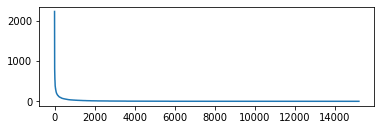

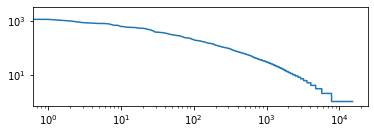

In [169]:
fig = plt.figure()
ax = fig.add_subplot(211)
plt.plot(range(len(counted_words)), counted_words['count'])
fig = plt.figure()
ax = fig.add_subplot(212)
plt.plot(range(len(counted_words)), counted_words['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [170]:
Reddit_Text = nltk.Text(word_lst)
redditIndex = nltk.text.ConcordanceIndex(Reddit_Text) 
redditIndex.print_concordance('student')

Displaying 25 of 207 matches:
ests/new?ticket_form_id=38824 banks student loans credit reports debt collector
 companies to match their employees student loan repayments in the same way com
rding to the article employees with student loan debt accumulate 50 less wealth
 by age 30 than their peers without student loan debt i think most of us with s
t loan debt i think most of us with student debt have at one point or another f
you would be able to make qualified student loan payments and have your company
ch month you made a payment on your student loan this does n't hurt people with
g my way out of that lovely college student debt i incurred over four years and
w.consumeraffairs.com news feds sue student loan servicer navient-011817.html >
lower payments > > deceived private student loan borrowers about requirements t
rom accruing > however most federal student loan borrowers earned the right in 
 newsroom cfpb sues nations largest student loan company navient failing borrow
om article

In [171]:
Reddit_Text.common_contexts(['loan'])

student_debt the_and the_i a_for student_forgiveness the_is car_and
student_you student_interest car_for your_balance the_in student_that
direct_program student_repayment a_and the_which of_| student_payments
student_servicer


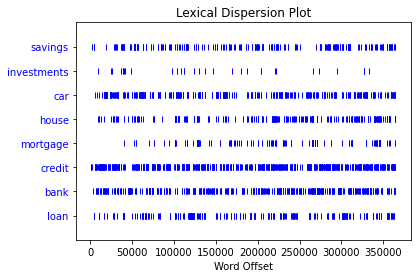

In [172]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
Reddit_Text.dispersion_plot(['savings','investments', 'car','house', 'mortgage' ,'credit', 'bank', 'loan'])
sns.set() #Re-enabling seaborn

In the plot, we find that most words appear evenly in the corpora, but investment and mortgage appear less often than others. 'Credit', 'Bank', 'loan' are the most popular.

## Normalize Token and Conditional Distribution

In [177]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

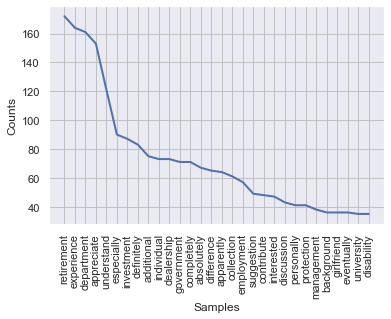

In [178]:
pf_df['words_count'] = pf_df['tokenized_text'].apply(lambda x: len(x))
pf_df['normalized_tokens'] = pf_df['tokenized_text'].apply(lambda x: normalizeTokens(x))
pf_df['normalized_tokens_count'] = pf_df['normalized_tokens'].apply(lambda x: len(x))

#.sum() adds together the lists from each row into a single list
# cfdist: conditional frequency distribution 
pf_cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in pf_df['normalized_tokens'].sum()))
pf_cfdist[10].plot(30);

In [181]:
pf_cpdist = nltk.ConditionalProbDist(pf_cfdist, nltk.ELEProbDist)

#print the most common 3 letter word
print(pf_cpdist[3].max())

#And its probability
print(pf_cpdist[3].prob(pf_cpdist[3].max()))

#print the most common 5 letter word
print(pf_cpdist[5].max())

#And its probability
print(pf_cpdist[5].prob(pf_cpdist[3].max()))

pay
0.08665428346279411
money
2.112958776174277e-05


### Pos to word conditional distribution

In [186]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

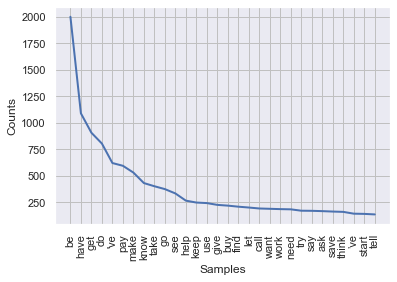

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [187]:
pf_df['normalized_tokens_POS'] = [spacy_pos(t) for t in pf_df['text']]
pf_cfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in pf_df['normalized_tokens_POS'].sum())
pf_cfdist_POStoWord['VB'].plot(30)

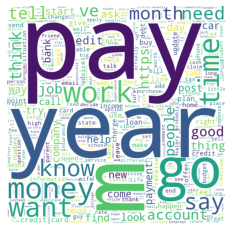

In [189]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(pf_df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("pf_word_cloud.png", format = 'png')